Found CSV files: ['iiserkol_facultybio.csv', 'nisersms_faculty.csv', 'niserscs_faculty.csv', 'iiserkol_facultymath.csv', 'iiserkol_facultychem.csv', 'nisersps_faculty.csv', 'iiserb_physics_faculty_full.csv', 'nisersbs_faculty.csv', 'iiserkol_facultyphy.csv', 'iiserbmath_faculty_phd_postdoc.csv', 'faculty_bhopbio.csv', 'faculty_with_phd.csv', 'iiserbpr_faculty.csv', 'iiserbchem_fac.csv']
Total data shape: (803, 21)


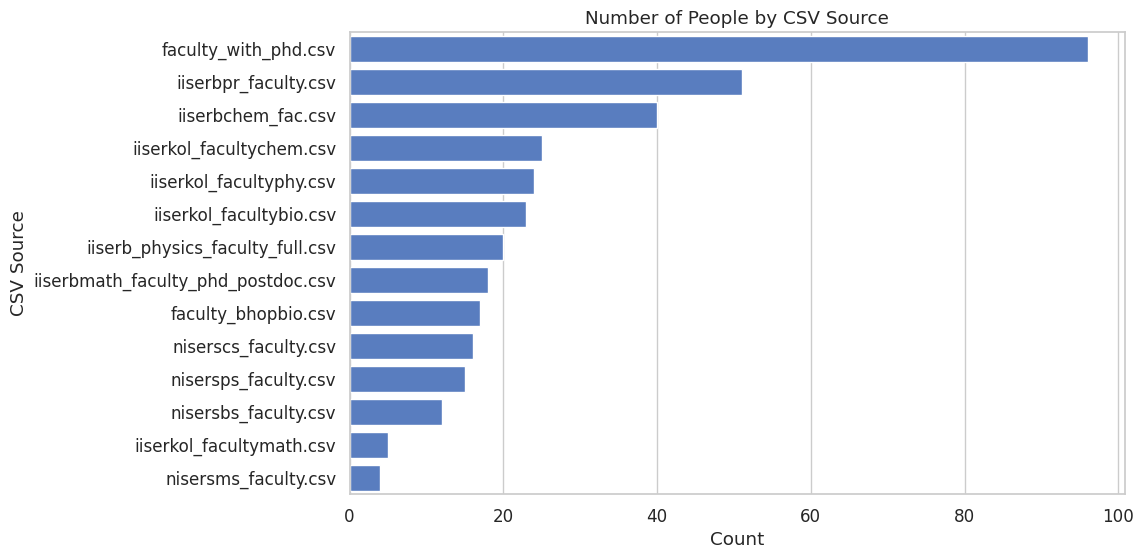

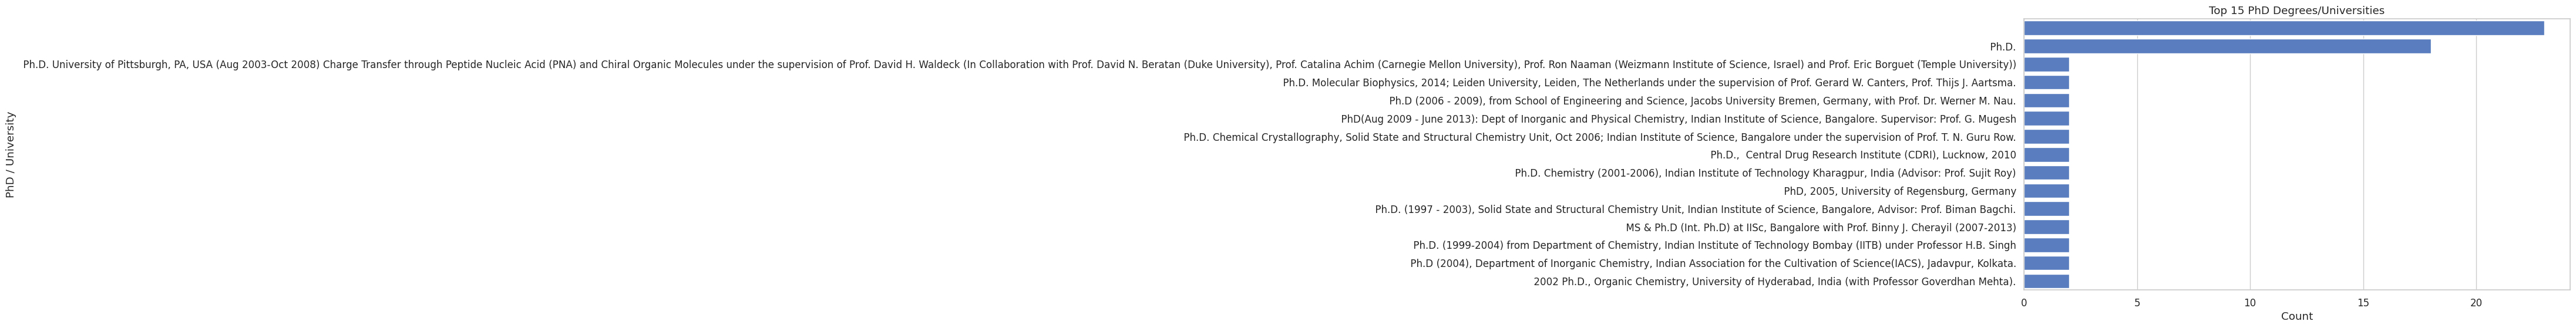

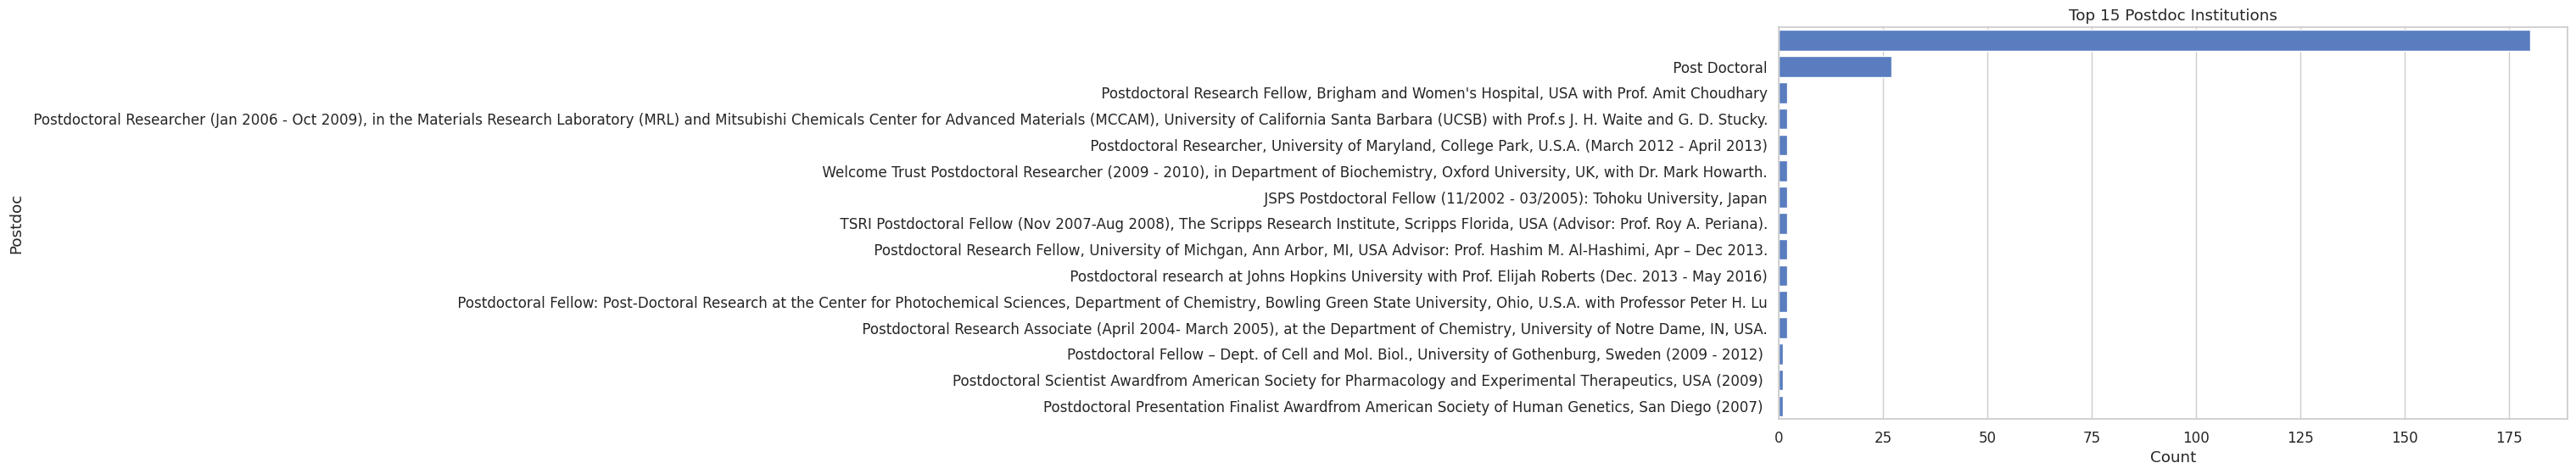

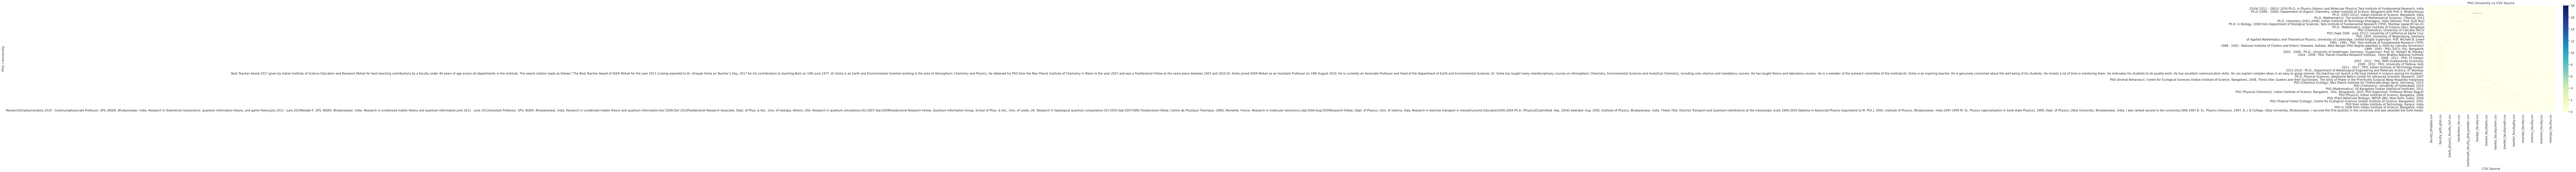

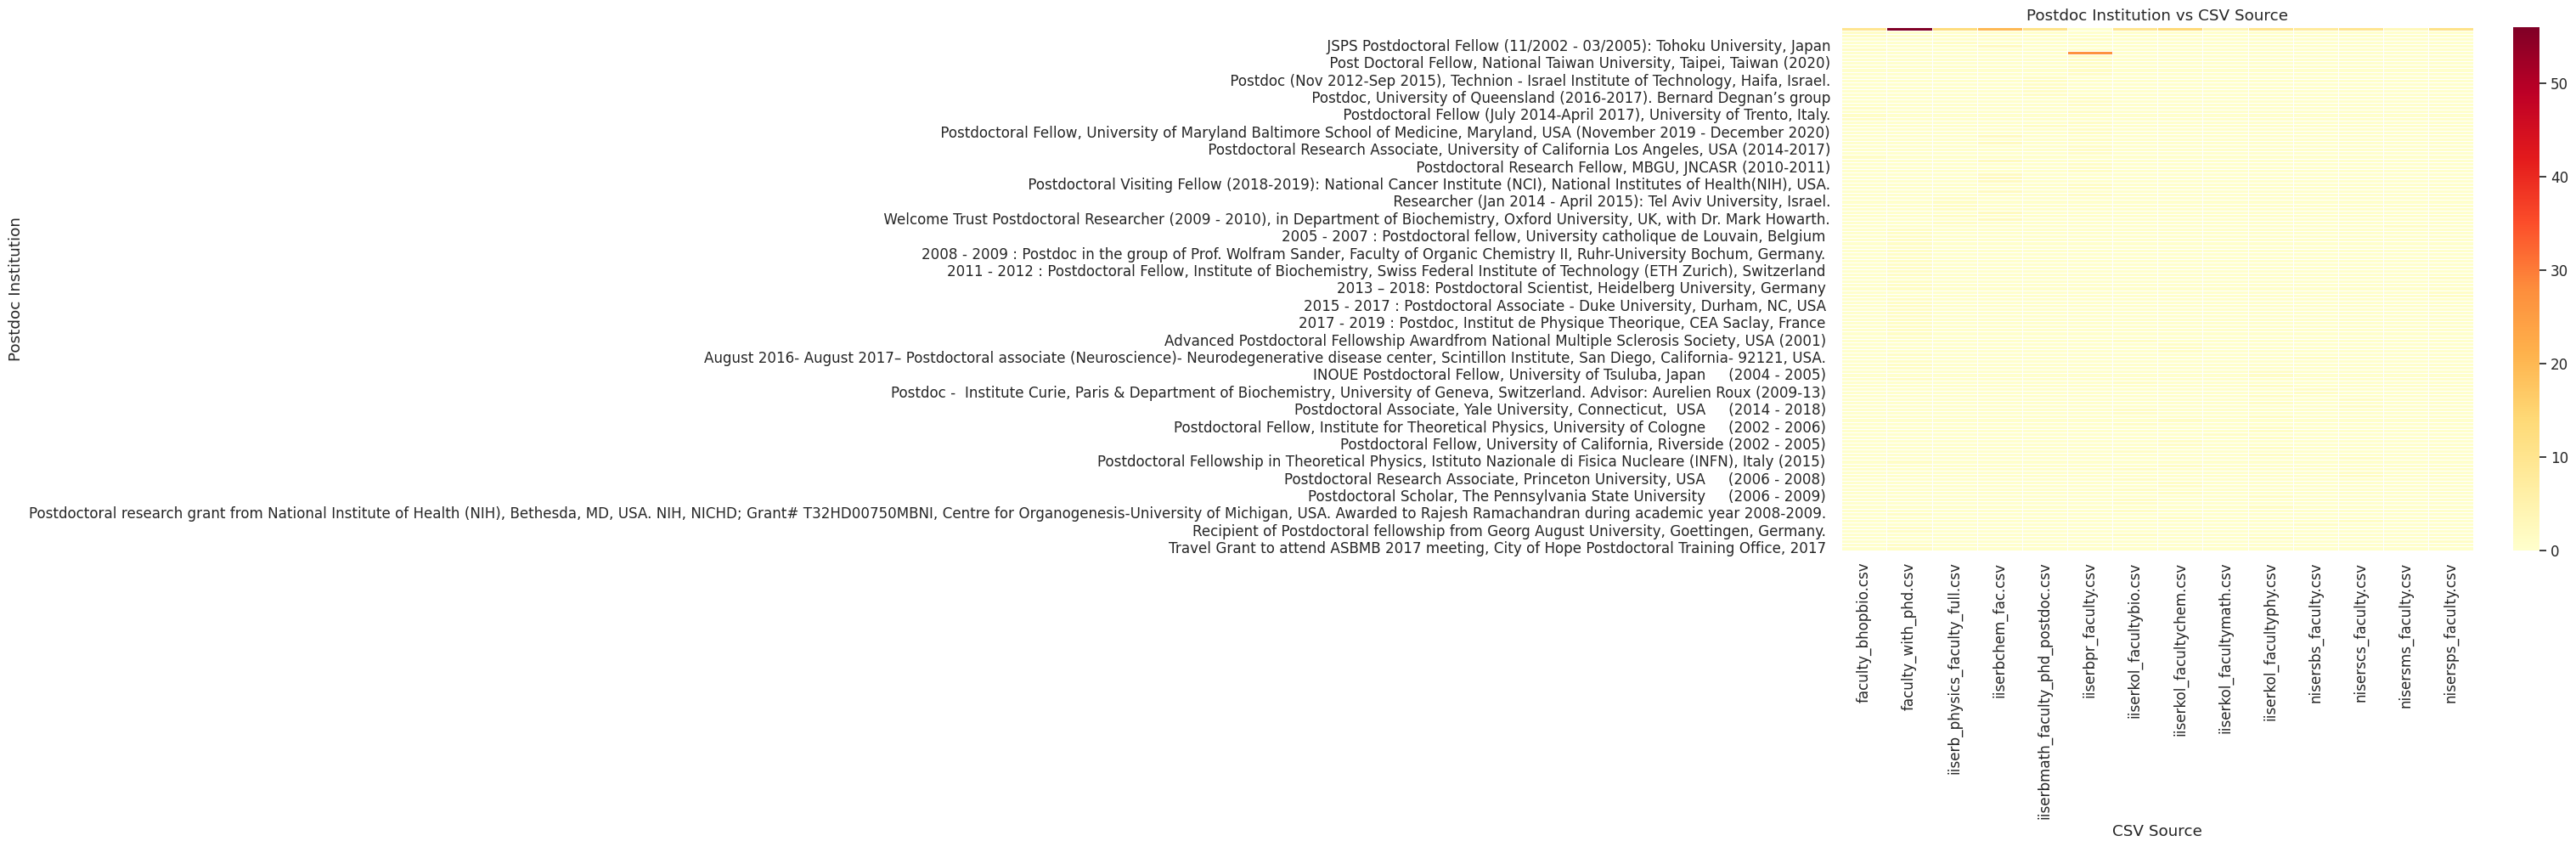

In [2]:
# --- Step 0: Import libraries ---
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# --- Step 1: Load all CSV files ---
file_paths = glob.glob("*.csv")  # adjust path if needed
print("Found CSV files:", file_paths)

dfs = []
for path in file_paths:
    df = pd.read_csv(path)
    df["source"] = path.split("/")[-1]  # keep track of CSV
    dfs.append(df)

# Combine all data
data = pd.concat(dfs, ignore_index=True)
print("Total data shape:", data.shape)

# --- Step 2: Merge PhD and Postdoc columns ---
data["phd_merged"] = data[["phd", "PhD"]].fillna("").astype(str).agg(" ".join, axis=1)
data["postdoc_merged"] = data[["postdoc", "Postdoc"]].fillna("").astype(str).agg(" ".join, axis=1)

# Optional: Drop rows where both PhD and Postdoc are empty
data = data[(data["phd_merged"].str.strip() != "") | (data["postdoc_merged"].str.strip() != "")]

# If you have a 'skills' column, keep it; otherwise you can skip skill plots
if "skills" not in data.columns:
    data["skills"] = None

# --- Step 3: Plotting ---

# 3a. Count of people per source CSV
plt.figure(figsize=(10,6))
source_counts = data['source'].value_counts()
sns.barplot(x=source_counts.values, y=source_counts.index)
plt.title("Number of People by CSV Source")
plt.xlabel("Count")
plt.ylabel("CSV Source")
plt.show()

# 3b. Top PhD entries
plt.figure(figsize=(12,6))
top_phds = data['phd_merged'].value_counts().head(15)
sns.barplot(x=top_phds.values, y=top_phds.index)
plt.title("Top 15 PhD Degrees/Universities")
plt.xlabel("Count")
plt.ylabel("PhD / University")
plt.show()

# 3c. Top Postdoc entries
plt.figure(figsize=(12,6))
top_postdocs = data['postdoc_merged'].value_counts().head(15)
sns.barplot(x=top_postdocs.values, y=top_postdocs.index)
plt.title("Top 15 Postdoc Institutions")
plt.xlabel("Count")
plt.ylabel("Postdoc")
plt.show()

# 3d. Heatmap PhD vs CSV source
pivot_phd = data.pivot_table(index='phd_merged', columns='source', aggfunc='size', fill_value=0)
plt.figure(figsize=(12,8))
sns.heatmap(pivot_phd, cmap="YlGnBu", linewidths=0.5)
plt.title("PhD University vs CSV Source")
plt.xlabel("CSV Source")
plt.ylabel("PhD / University")
plt.show()

# 3e. Heatmap Postdoc vs CSV source
pivot_postdoc = data.pivot_table(index='postdoc_merged', columns='source', aggfunc='size', fill_value=0)
plt.figure(figsize=(12,8))
sns.heatmap(pivot_postdoc, cmap="YlOrRd", linewidths=0.5)
plt.title("Postdoc Institution vs CSV Source")
plt.xlabel("CSV Source")
plt.ylabel("Postdoc Institution")
plt.show()

# 3f. Skills analysis (optional, if skills column exists)
if data["skills"].notna().sum() > 0:
    skills_list = data['skills'].dropna().str.split(',').sum()
    skills_counter = Counter([skill.strip() for skill in skills_list])
    top_skills = dict(skills_counter.most_common(15))

    plt.figure(figsize=(12,6))
    sns.barplot(x=list(top_skills.values()), y=list(top_skills.keys()))
    plt.title("Top 15 Skills")
    plt.xlabel("Count")
    plt.ylabel("Skill")
    plt.show()
